# Building A Handwritten Digits Classifier

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

digits_data = load_digits()

In [2]:
digits = load_digits()

# Create feature matrix
X = pd.DataFrame(digits.data)

# Create target vector
y = pd.Series(digits.target)

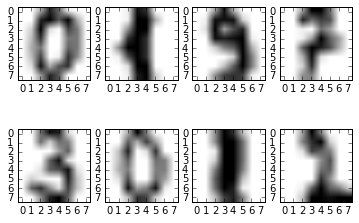

In [3]:
fig, ax = plt.subplots(2, 4)

ax[0, 0].imshow(X.iloc[0].values.reshape(8,8), cmap='gray_r')
ax[0, 1].imshow(X.iloc[99].values.reshape(8,8), cmap='gray_r')
ax[0, 2].imshow(X.iloc[199].values.reshape(8,8), cmap='gray_r')
ax[0, 3].imshow(X.iloc[299].values.reshape(8,8), cmap='gray_r')

ax[1, 0].imshow(X.iloc[999].values.reshape(8,8), cmap='gray_r')
ax[1, 1].imshow(X.iloc[1099].values.reshape(8,8), cmap='gray_r')
ax[1, 2].imshow(X.iloc[1199].values.reshape(8,8), cmap='gray_r')
ax[1, 3].imshow(X.iloc[1299].values.reshape(8,8), cmap='gray_r')
plt.show()

In [4]:
def train(n, X, y):
    model = KNeighborsClassifier(n_neighbors = n)
    model.fit(X, y)
    return(model)

def test(model, X, y):
    predictions = model.predict(X)
    accuracy = accuracy_score(y, predictions)
    return(accuracy)

def cross_validate(X,y,n):
    accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(X):
        train_X, test_X = X.loc[train_index], X.loc[test_index]
        train_y, test_y = y.loc[train_index], y.loc[test_index]
        model = train(n, train_X, train_y)
        accuracy = test(model, test_X, test_y)
        accuracies.append(accuracy)
    return(accuracies)

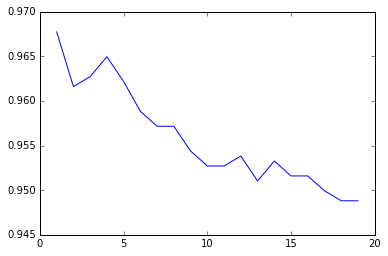

In [5]:
accuracies = []
k_max = 20
for k in range(1,k_max):
    accurancy = cross_validate(X,y,k)
    mean_accuracy = np.mean(accurancy)
    accuracies.append(mean_accuracy)

plt.plot(list(range(1,k_max)), accuracies)

In [6]:
def train_nn(n, X, y):
    model = MLPClassifier(hidden_layer_sizes=n)
    model.fit(X, y)
    return(model)


def cross_validate_nn(X,y,n):
    accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(X):
        train_X, test_X = X.loc[train_index], X.loc[test_index]
        train_y, test_y = y.loc[train_index], y.loc[test_index]
        model = train_nn(n, train_X, train_y)
        accuracy = test(model, test_X, test_y)
        accuracies.append(accuracy)
    return(accuracies)

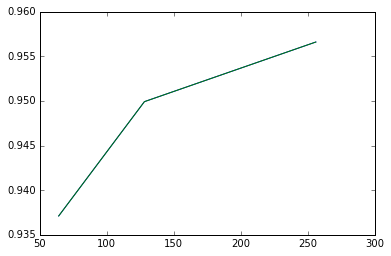

In [7]:
accuracies = []

neurons = [(64,64),(128, 128),(256, 256)]

for k in neurons:
    accurancy = cross_validate_nn(X,y,k)
    mean_accuracy = np.mean(accurancy)
    accuracies.append(mean_accuracy)

plt.plot(list(neurons), accuracies)

In [8]:
accuracies


[0.937110863647612, 0.9499133877753031, 0.9565936649344222]

Great accurancies but it takes time